# Scientific Visualization - Example 1
Visualization based on Figure 1.10 from book "Scientific Visualization: Python + Matplotlib".

Based on https://github.com/rougier/scientific-visualization-book/blob/master/code/anatomy/zorder-plots.py.

In [14]:
using Pkg
Pkg.activate(".")
using CairoMakie

CairoMakie.activate!(type = "svg")

  Activating environment at `~/MEGA/EMAp/Julia_Tutorials/Visualizations/Project.toml`


In [35]:
using GLMakie
GLMakie.activate!()

In [50]:
f, ax, pl = barplot(rand(5), bar_labels=:y, figure=(resolution=(500, 500),))
hideydecorations!(ax)
hidespines!(ax, :t, :r, :l)
hidexdecorations!(ax, ticks=false)
tightlimits!(ax)
f
img = Makie.colorbuffer(ax.scene)

f, ax, pl = scatter(rand(Point2f, 100), axis=(aspect = DataAspect(),))
impl = image!(ax, 0..1, 0..1, rotr90(img))
display(f)

rotate!(impl, -0.25pi)
translate!(impl, 0.5, 1.2, 0)
xlims!(ax, 0, 2)
ylims!(ax, 0, 2)

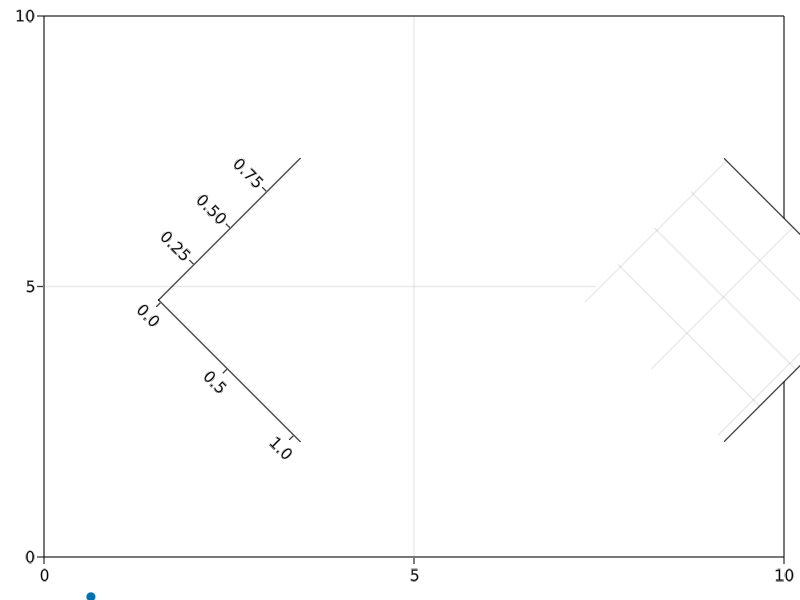

In [58]:
fig = Figure()
b = Axis(fig[1, 1])
scene = Scene(fig.scene)
campixel!(scene)
ax = Axis(scene, bbox = MakieLayout.BBox(-100, 100, -100, 100))
scatter!(ax, rand(10,2))

# for s in (scene, ax.scene)
#     @show s
    Makie.rotate!(s, Vec3f(0,0,1), -pi/4)
#     translate!(s, Vec3f(300, 300, 100))
# end
# display(fig)
translate!(scene, Vec3f(300, 300, 100))
Makie.rotate!(scene, Vec3f(0,0,1), -pi/4)
# translate!(ax.scene, Vec3f(300, 300, 100))
# Makie.rotate!(ax.scene, Vec3f(0,0,1), -pi/4)
elements = keys(ax.elements)
filtered = filter(ele -> ele != :xaxis && ele != :yaxis, elements)
foreach(ele -> translate!(ax.elements[ele], Vec3f(300, 300, 100)), filtered)
fig

In [389]:
import AlgebraOfGraphics: aog_theme
set_theme!(;aog_theme()...)

In [390]:
colors =  cgrad(:Spectral, 12, categorical = true);

In [62]:
months = ["January", "February", "March", "April",
    "May", "June", "July", "August", "September",
    "October", "November", "December"]

f = Figure(resolution=(500,200))

Ax = Axis(f[1,1], title="Main")
# ax = Axis(f[1, 1], title = "Fictive temperatures",
#     yticks = ((1:12) ./ 4,  reverse(months)))

# for i in 12:-1:1
for i in 1
#     d = density!(randn(20)*2, offset = i / 4,
#         color=colors[abs(i)],
#         strokewidth = 1, strokecolor = :black)
    ax = Axis(f, bbox=BBox(0,100,0,100),xticklabelsize=12, yticklabelsize=12, backgroundcolor=:grey95)
#     hidespines!(ax,:l)
#     hideydecorations!(ax)
    d = density!(randn(20)*2,
        color=colors[abs(1)],
        strokewidth = 1, strokecolor = :black)
    tightlimits!(ax, Bottom())
#     translate!(ax.scene, 0, 0.01, 10)
    elements = keys(ax.elements)
    filtered = filter(ele -> ele != :xaxis && ele != :yaxis, elements)
    foreach(ele -> translate!(ax.elements[ele], 100, 0.0, 0), filtered)
    # this helps with layering in GLMakie
#     translate!(d, 0, 0.01, -0.1i)
end
vlines!(ax,[0],linestyle = :dash, color=:black)
f

LoadError: UndefVarError: colors not defined

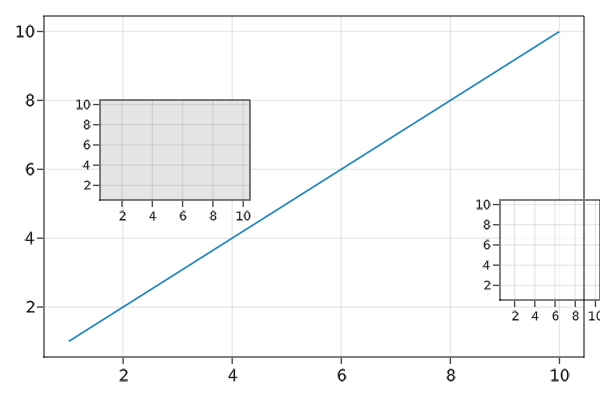

In [79]:
function add_box_inset(fig; left=100, right=250, bottom=200, top=300,bgcolor=:grey90)
    scene = Scene(fig.scene)
    campixel!(scene)
    inset_box = Axis(scene, bbox=BBox(left, right, bottom, top),
    xticklabelsize=12, yticklabelsize=12, backgroundcolor=bgcolor)
    # bring content upfront
    
    Makie.rotate!(inset_box.scene, Vec3f(0,0,1), -pi/4)
    translate!(inset_box.scene, 0, 0, 10)
    elements = keys(inset_box.elements)
    filtered = filter(ele -> ele != :xaxis && ele != :yaxis, elements)
    foreach(ele -> translate!(inset_box.elements[ele], 0, 0, 9), filtered)
    return inset_box
end

function figure_box_inset()
    fig = Figure(resolution=(600, 400))
    ax = Axis(fig[1, 1], backgroundcolor=:white)
    inset_ax1 = add_box_inset(fig; left=100, right=250, bottom=200, top=300,
    bgcolor=:grey90)
    inset_ax2 = add_box_inset(fig; left=500, right=600, bottom=100, top=200,
    bgcolor=(:white, 0.65))
    lines!(ax, 1:10)
    lines!(inset_ax1, 1:10)
    scatter!(inset_ax2, 1:10, color=:black)
    fig
end

figure_box_inset()

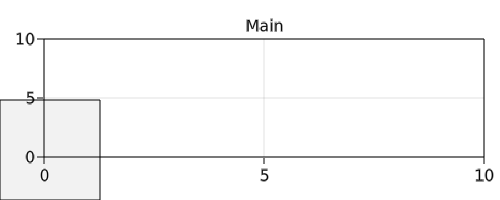

In [65]:
f

In [400]:
f.content

2-element Vector{Any}:
 Axis (1 plots)
 Axis (3 plots)

In [384]:
using Luxor

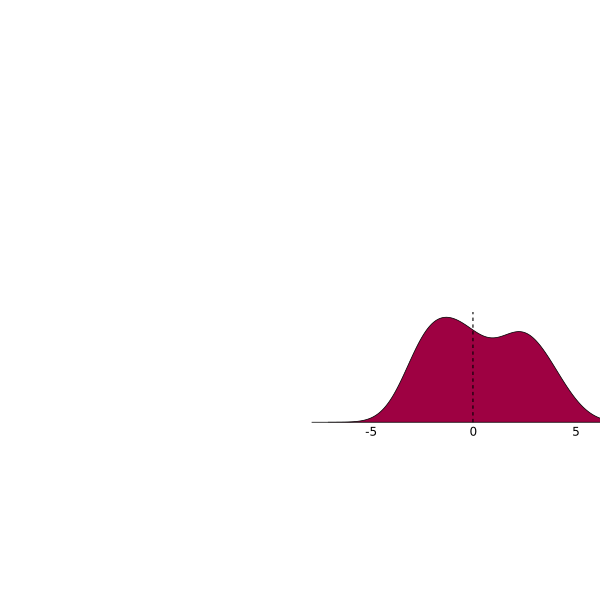

In [385]:
@draw begin
    mycoollogo = readsvg("figure.svg")
    placeimage(mycoollogo)
end